Assigment 1

I want you to use 3 different feature scale methods separately. write a function for this and return the X_scaled variable. Compare the mean squared error results from the 3 methods and report your results. It would be better if you change the code completely into functions (function for cost calculation etc.).


Mean Squared Error: 26880.22398238764


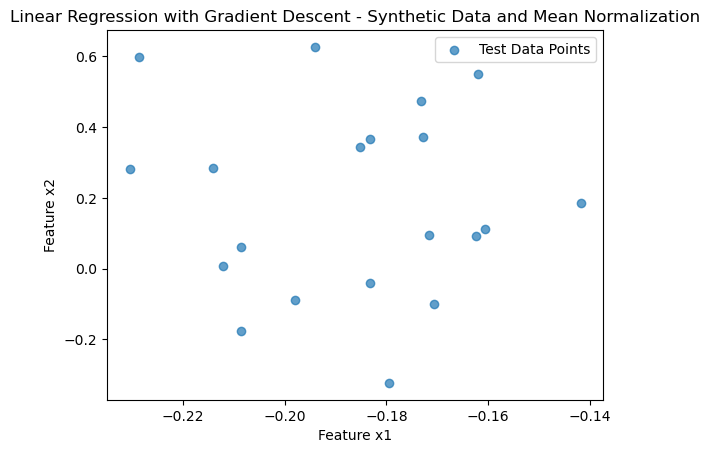

Learned Coefficients (Weights):
[[-370.99820544]
 [ 727.87495249]]
Bias (Intercept): 2193.224515961517


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate synthetic data with different feature scales
np.random.seed(0)

# Daily temperature (feature x1) with a range of [20, 40] degrees Celsius
temperature = 20 + 20 * np.random.rand(100, 1)

# Ice cream sales (feature x2) with a range of [0, 200] units
ice_cream_sales = 200 * np.random.rand(100, 1)

# Combine temperature and ice cream sales into a single feature matrix X
X = np.hstack((temperature, ice_cream_sales))

# Daily profit (target variable y)
# Assume that daily profit depends on the temperature, ice cream sales,
# and some random noise (normal distribution)
y = 1000 + 30 * temperature + 5 * ice_cream_sales + np.random.randn(100, 1)

# Now, you have synthetic data to analyze and build a predictive model for daily profit based on temperature and ice cream sales.

# Perform mean normalization (standardization) on input features

#!!! create a function and scale our X and return X_scaled
#!!! do this for whole method like max, mean and z-score 
#!!! compare the result
def X_sclaed_max(x):
    return x/np.max(x)
def X_sclaed_mean(x):
    return (x-np.mean(x))/(np.max(x)-np.min(x))
def X_sclaed_zscore(x):
    return (x-np.mean(x))/(np.std(x))

# Split the data into training and testing sets
X_scaled = X_sclaed_mean(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Rest of your code for linear regression, gradient descent, and evaluation
# Initialize the weights and bias terms closer to zero
n_features = X_train.shape[1]
w = np.zeros((n_features, 1))  # Match the shape of the weights to (n_features, 1)
b = 0

# Use a smaller learning rate for smoother convergence
alpha = 0.01  # Learning rate
num_iterations = 1000

# Implement gradient descent
m = len(X_train)  # Number of training data points

for iteration in range(num_iterations):
    # Compute predictions
    y_pred = np.dot(X_train, w) + b

    # Compute gradients
    w_gradient = (1 / m) * np.dot(X_train.T, (y_pred - y_train))
    b_gradient = (1 / m) * np.sum(y_pred - y_train)

    # Update weights and bias
    w -= alpha * w_gradient.reshape(-1, 1)  # Reshape to match the shape of w
    b -= alpha * b_gradient

# Make predictions on the test data
y_pred = np.dot(X_test, w) + b

# Evaluate the model using Mean Squared Error (MSE)
mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error:", mse)

# Plot one feature (e.g., x1) against y_test
plt.scatter(X_test[:, 0], X_test[:, 1], label='Test Data Points', alpha=0.7)

plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.title('Linear Regression with Gradient Descent - Synthetic Data and Mean Normalization')
plt.show()
# Print the learned coefficients
print("Learned Coefficients (Weights):")
print(w)
print("Bias (Intercept):", b)

 1. **Max Scaling  &rarr; Mean Squared Error: 19043.84044459253**
 2. **Mean Scaling &rarr; Mean Squared Error: 26880.22398238764**
 3. **Zscore Scaling &rarr; Mean Squared Error: 50149.82816178191**
 
 According the Mean Squared Error value, **Max Scaling** is the best normalization technique to this data since it has the smallest mean squared error, while **Zscore Scaling** is the worst normalization technique because the higher mean squared error value.